FineGrain Box Segmenter
====

### Installation

* Install `uv` 
```bash
# On macOS and Linux.
curl -LsSf https://astral.sh/uv/install.sh | sh
``` 
   * Clone and install refiners

```bash
git clone https://github.com/finegrain-ai/refiners.git
cd refiners
uv sync --all-extras
```

  * Install jupyter kernel, matplolib
```bash
python -m venv .venv
source .venv/bin/activate
uv add ipykernel
uv add matplotlib
python -m ipykernel install --user --name refiners --display-name "Python (refiners)"
```

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
from refiners.solutions import BoxSegmenter

# Downloads the weights from finegrain/finegrain-box-segmenter
segmenter = BoxSegmenter()

/home/pyml/git_vmirly/GenAI-Hub/tmp/refiners/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
image = Image.open("../samples/plants.jpg").convert("RGB")
w, h = image.size

# resize image
image = image.resize((w // 2, h // 2))

image.size

(534, 568)

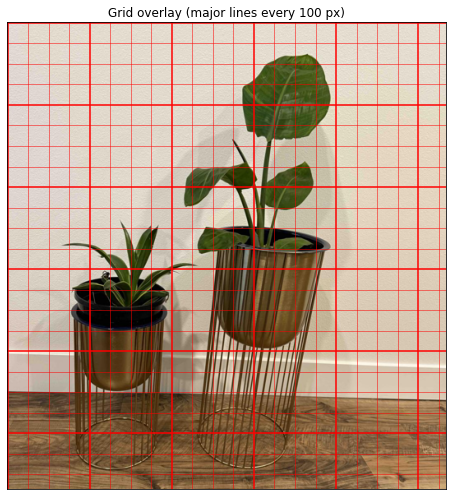

In [ ]:
def plot_overlay_grid(image, minor_step=25, major_step=100):
    width, height = image.size

# Convert to numpy array
    image_np = np.array(image)

    # Set up plot
    fig, ax = plt.subplots(figsize=(7, 7), dpi=72)
    ax.imshow(image_np)

    # Draw vertical grid lines
    for x in range(0, width, minor_step):
        linewidth = 1.5 if x % major_step == 0 else 0.5
        ax.axvline(x, color='red', linewidth=linewidth)

    # Draw horizontal grid lines
    for y in range(0, height, minor_step):
        linewidth = 1.5 if y % major_step == 0 else 0.5
        ax.axhline(y, color='red', linewidth=linewidth)

    # Turn off axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    plt.title("Grid overlay (major lines every 100 px)")
    plt.tight_layout()
    plt.show()

plot_overlay_grid(image, minor_step=25, major_step=100)

In [8]:
from PIL import Image, ImageDraw

def draw_bounding_box(image, box, color="red", width=2):
    image_with_box = image.copy()
    draw = ImageDraw.Draw(image_with_box)
    draw.rectangle(box, outline=color, width=width)
    return image_with_box


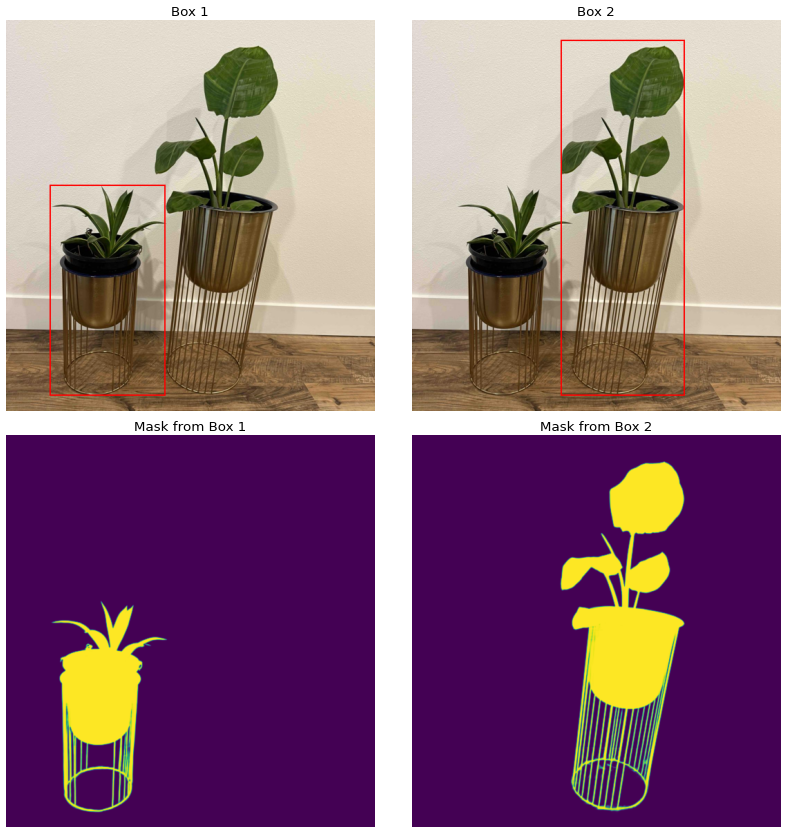

In [11]:
# first box: (63, 240, 230, 545)
# second box: (215, 30, 394, 545)

box1 = (63, 240, 230, 545)
mask1 = segmenter(image, box_prompt=box1)

box2 = (215, 30, 394, 545)
mask2 = segmenter(image, box_prompt=box2)

fig, axes = plt.subplots(2, 2, figsize=(14, 14), dpi=60)
axes = axes.ravel()

axes[0].imshow(draw_bounding_box(image, box1))
axes[0].set_title("Box 1", fontsize=16)
axes[0].axis("off")
axes[1].imshow(draw_bounding_box(image, box2))
axes[1].set_title("Box 2", fontsize=16)
axes[1].axis("off")

axes[2].imshow(mask1)
axes[2].set_title("Mask from Box 1", fontsize=16)
axes[2].axis("off")
axes[3].imshow(mask2)
axes[3].set_title("Mask from Box 2", fontsize=16)
axes[3].axis("off")
plt.tight_layout()
plt.show()